<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/labs/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°05


## Problema 01

<img src="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png" width = "500" align="center"/>


El **Iris dataset** es un conjunto de datos que contiene muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midieron cuatro características en cada muestra: el largo y ancho del sépalo y del pétalo, ambos en centímetros. Este conjunto de datos es comúnmente utilizado para análisis de clasificación y para demostrar algoritmos de machine learning en la ciencia de datos.

### Descripción de los Datos:

1. **sepal_length**: Largo del sépalo en centímetros.
2. **sepal_width**: Ancho del sépalo en centímetros.
3. **petal_length**: Largo del pétalo en centímetros.
4. **petal_width**: Ancho del pétalo en centímetros.
5. **species**: La especie de la flor (Iris setosa, Iris virginica, Iris versicolor).

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:



In [1]:
# librerias

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [2]:
# cargar datos
data= pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2024/main/docs/labs/data/iris_contaminados.csv")

data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del Experimento

El primer paso en el análisis es identificar las variables clave del estudio y definir su naturaleza:

* **species**:
    * **Descripción**: Nombre de la especie de Iris a la que pertenece cada observación.
    * **Tipo de dato**: *string*.
    * **Restricciones**: Solo se consideran tres especies (Iris setosa, Iris virginica, e Iris versicolor).
* **sepalLength**:
    * **Descripción**: Longitud del sépalo en centímetros.
    * **Tipo de dato**: *float*.
    * **Rango**: Los valores oscilan entre 4.0 cm y 7.0 cm.
* **sepalWidth**:
    * **Descripción**: Ancho del sépalo en centímetros.
    * **Tipo de dato**: *float*.
    * **Rango**: Los valores varían entre 2.0 cm y 4.5 cm.
* **petalLength**:
    * **Descripción**: Longitud del pétalo en centímetros.
    * **Tipo de dato**: *float*.
    * **Rango**: Los valores están comprendidos entre 1.0 cm y 7.0 cm.
* **petalWidth**:
    * **Descripción**: Ancho del pétalo en centímetros.
    * **Tipo de dato**: *float*.
    * **Rango**: Los valores se encuentran entre 0.1 cm y 2.5 cm.

Esta descripción clara de las variables y sus limitaciones es esencial para establecer una base sólida en el análisis de datos.

Su objetivo es realizar un **Análisis Exploratorio de Datos (EDA)** completo y riguroso. Para lograrlo, siga las instrucciones proporcionadas a continuación, asegurándose de extraer conclusiones intermedias después de cada pregunta, y de elaborar una conclusión general al finalizar todas las preguntas.

 Esto le permitirá identificar patrones, anomalías y relaciones clave entre las variables antes de proceder con un análisis más profundo.

1. Realice un conteo de los elementos en la columna **species** y ajuste cualquier valor que considere incorrecto. Reemplace los valores `NaN` con "default".

In [3]:
data.info()
data['species'].unique()
data['species'] = data['species'].str.lower().str.replace(' ','').fillna('default')
data['species'].unique()
data['species'].count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


150

2. Genere un gráfico de box-plot para visualizar la distribución del largo y ancho de los pétalos y sépalos. Antes de crear el gráfico, reemplace los valores `NaN` por **0**.

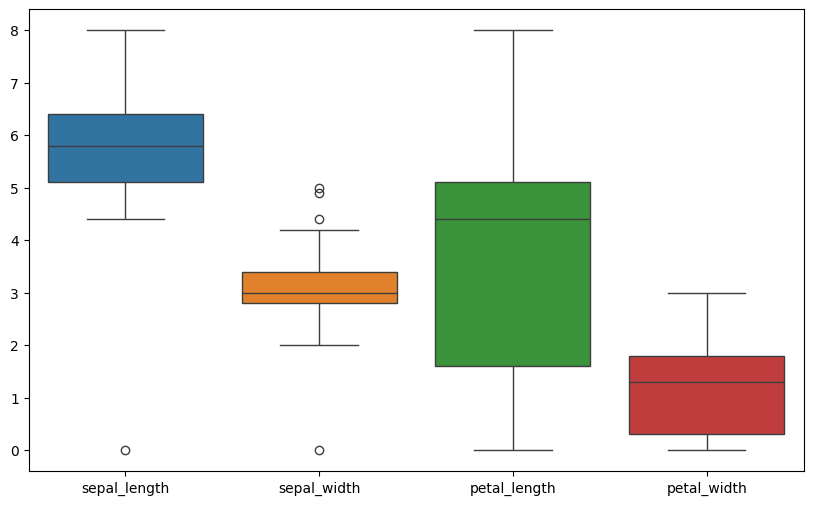

In [4]:
data = data.fillna(0)
plt.figure(figsize = (10,6))
sns.boxplot(data)
plt.show()

3. Utilizando los rangos de valores válidos previamente definidos para el largo y ancho de los pétalos y sépalos, agregue una nueva columna denominada **label**. Esta columna debe identificar si algún valor se encuentra fuera del rango permitido. Marque los valores fuera de rango con "fuera de rango" y los valores dentro del rango con "dentro del rango".

In [5]:
conditions =[(4.0 > data['sepal_length']) |
              (data['sepal_length'] > 7.0) ,
              (2.0 > data['sepal_width']) |
              (data['sepal_width'] > 4.5) ,
              (0.1 > data['petal_width']) |
              (data['petal_width'] > 2.5),
              (data['petal_length'] > 7.0) |
              (1.0 > data['petal_length'])
              ]
result = ['out of range','out of range','out of range','out of range']

data['label'] = np.select(conditions,result,default = 'in range')
data

,sepal_length,sepal_width,petal_length,petal_width,species,label
0,4.4,3.2,1.3,3.0,setosa,out of range
1,7.2,3.6,6.1,2.5,virginica,out of range
2,6.3,3.3,6.0,2.5,virginica,in range
3,6.7,3.3,5.7,2.5,virginica,in range
4,6.3,3.4,5.6,2.4,virginica,in range
...,...,...,...,...,...,...
145,5.3,3.0,1.1,0.1,setosa,in range
146,4.8,3.0,1.4,0.1,setosa,in range
147,4.9,3.1,1.5,0.1,setosa,in range
148,4.9,3.6,1.4,0.1,setosa,in range


4. Genere dos gráficos de dispersión:

   - El primero, mostrando la relación entre **sepal_length** y **petal_length**.
   - El segundo, mostrando la relación entre **sepal_width** y **petal_width**.

En ambos gráficos, los puntos deben estar categorizados por la columna **label** (es decir, "dentro del rango" o "fuera del rango").

Concluya los resultados evaluando la relación entre las variables y si los valores fuera de rango afectan significativamente la distribución o comportamiento de los datos.

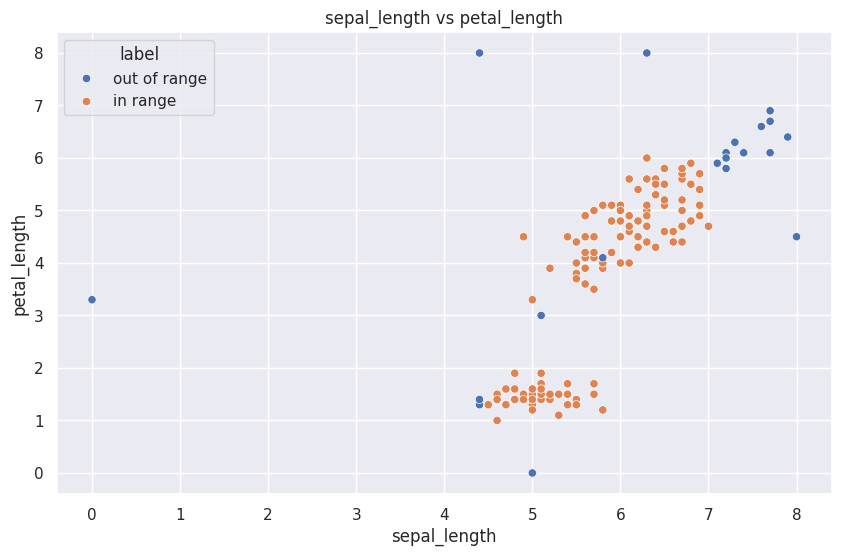

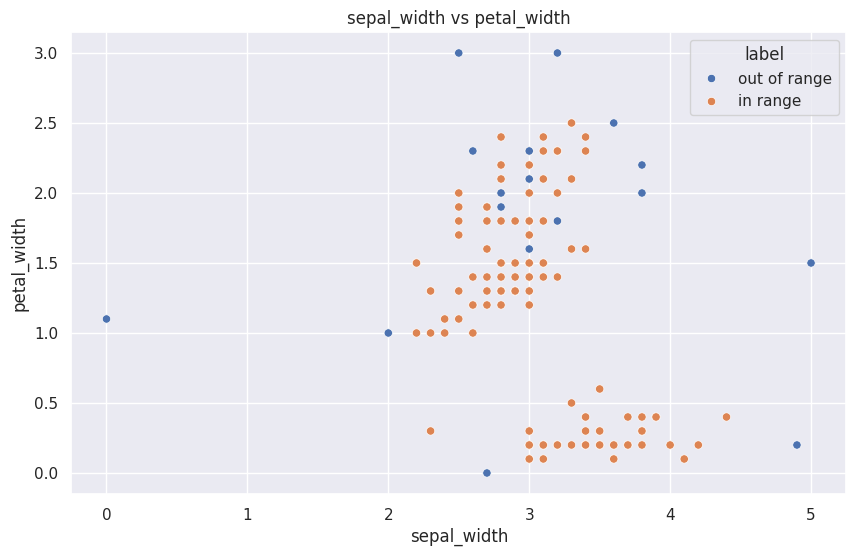

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=data,
    x = 'sepal_length',
    y = 'petal_length',
    hue = 'label',
)
plt.title('sepal_length vs petal_length')

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=data,
    x = 'sepal_width',
    y = 'petal_width',
    hue = 'label',
)
plt.title('sepal_width vs petal_width')
plt.show()

5. Filtre los datos para conservar solo aquellos que estén dentro del rango válido. Luego, genere un gráfico de dispersión mostrando la relación entre **sepal_length** y **petal_length**, categorizando los puntos por la columna **species**. Esto permitirá visualizar cómo varían estas dimensiones entre las diferentes especies de Iris.

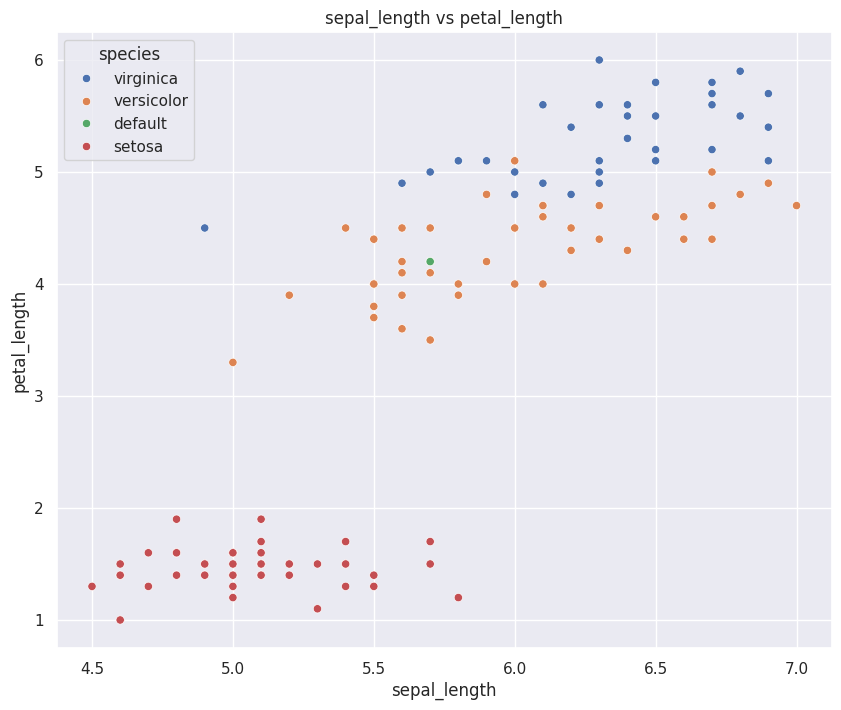

In [10]:
sns.set(rc={'figure.figsize':(10,8)})
sns.scatterplot(
    x = 'sepal_length',
    y = 'petal_length',
    data = data.loc[data['label']=='in range'],
    hue = 'species'
)
plt.title('sepal_length vs petal_length')
plt.show()